# 01 - Training Results - Comparing Network Architectures

In [1]:
import os

os.chdir('..')

In [2]:
from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/models/'


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_name,history_file,specs_name,model,loss,opt,no_epochs,batch_size,total_batch_size,learning_rate,wd,full_ds,aug,scheduler,mixed_precision,model_mean,model_std,input_size,date
0,clef2021_resnest101_ce_06-20-2021_12-47,clef2021_resnest101_ce_06-20-2021_12-47.csv,clef2021_resnest101_ce_06-20-2021_12-47.json,resnest101,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",256,06-20-2021_12-47
1,clef2021_resnet101_ce_06-21-2021_08-23,clef2021_resnet101_ce_06-21-2021_08-23.csv,clef2021_resnet101_ce_06-21-2021_08-23.json,resnet101,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-21-2021_08-23
2,clef2021_resnext50_ce_06-21-2021_13-13,clef2021_resnext50_ce_06-21-2021_13-13.csv,clef2021_resnext50_ce_06-21-2021_13-13.json,resnext50,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-21-2021_13-13
3,clef2021_resnet50_ce_06-21-2021_17-00,clef2021_resnet50_ce_06-21-2021_17-00.csv,clef2021_resnet50_ce_06-21-2021_17-00.json,resnet50,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-21-2021_17-00
4,clef2021_resnest50_ce_06-21-2021_22-36,clef2021_resnest50_ce_06-21-2021_22-36.csv,clef2021_resnest50_ce_06-21-2021_22-36.json,resnest50,ce,sgd,30,128,128,0.01,0.01,False,False,False,False,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-21-2021_22-36
5,clef2021_resnext101_ce_06-22-2021_13-39,clef2021_resnext101_ce_06-22-2021_13-39.csv,clef2021_resnext101_ce_06-22-2021_13-39.json,resnext101,ce,sgd,30,128,128,0.01,0.01,False,False,False,True,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-22-2021_13-39
6,clef2021_resnest101_ce_06-24-2021_18-27,clef2021_resnest101_ce_06-24-2021_18-27.csv,clef2021_resnest101_ce_06-24-2021_18-27.json,resnest101,ce,sgd,30,128,128,0.01,0.01,False,False,False,True,"[0.485, 0.456, 0.406]","[0.229, 0.224, 0.225]",224,06-24-2021_18-27


## Residual Networks of Depth 50 (ResNet-50, ResNeXt-50, ResNeSt-50)

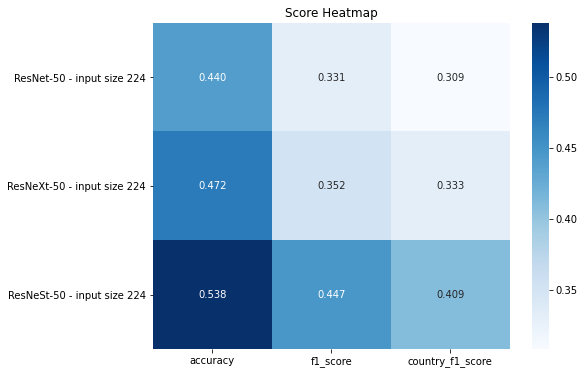

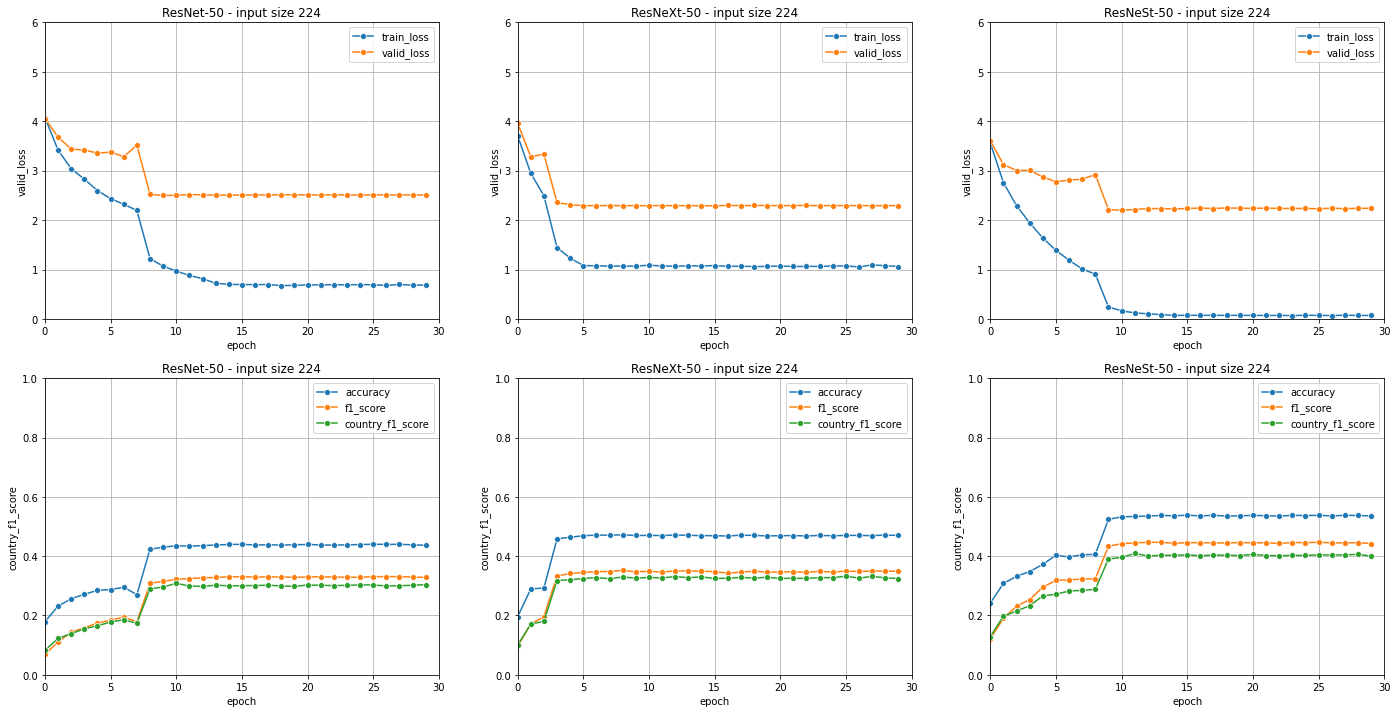

In [3]:
params = dict(loss='ce', input_size=224, batch_size=128)
g1 = results.filter_items(df, outlen=None, model='resnet50', **params)
g2 = results.filter_items(df, outlen=30, model='resnext50', **params)
g3 = results.filter_items(df, outlen=30, model='resnest50', **params)


group_dict = {
    'ResNet-50 - input size 224': g1,
    'ResNeXt-50 - input size 224': g2,
    'ResNeSt-50 - input size 224': g3}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict)

## Residual Networks of Depth 101 (ResNet-101, ResNeXt-101, ResNeSt-101)

Notice that the input size of ResNeSt-101 is 256 which is larger compared to ResNet-101 and ResNeXt-101. This gives an advantage to the ResNeSt.

When fine-tuning ResNeXt-101, the network did not fit into GPU memory and we used mixed precision training to keep the equivalent batch size (128).

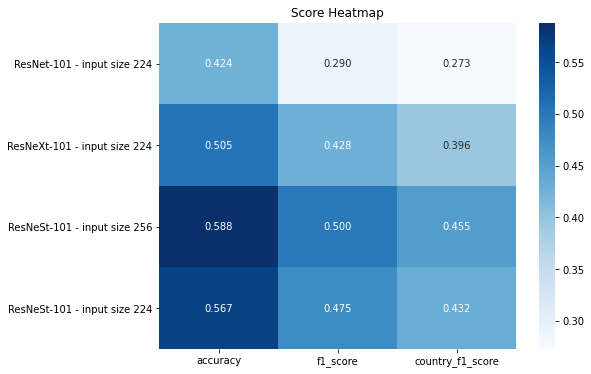

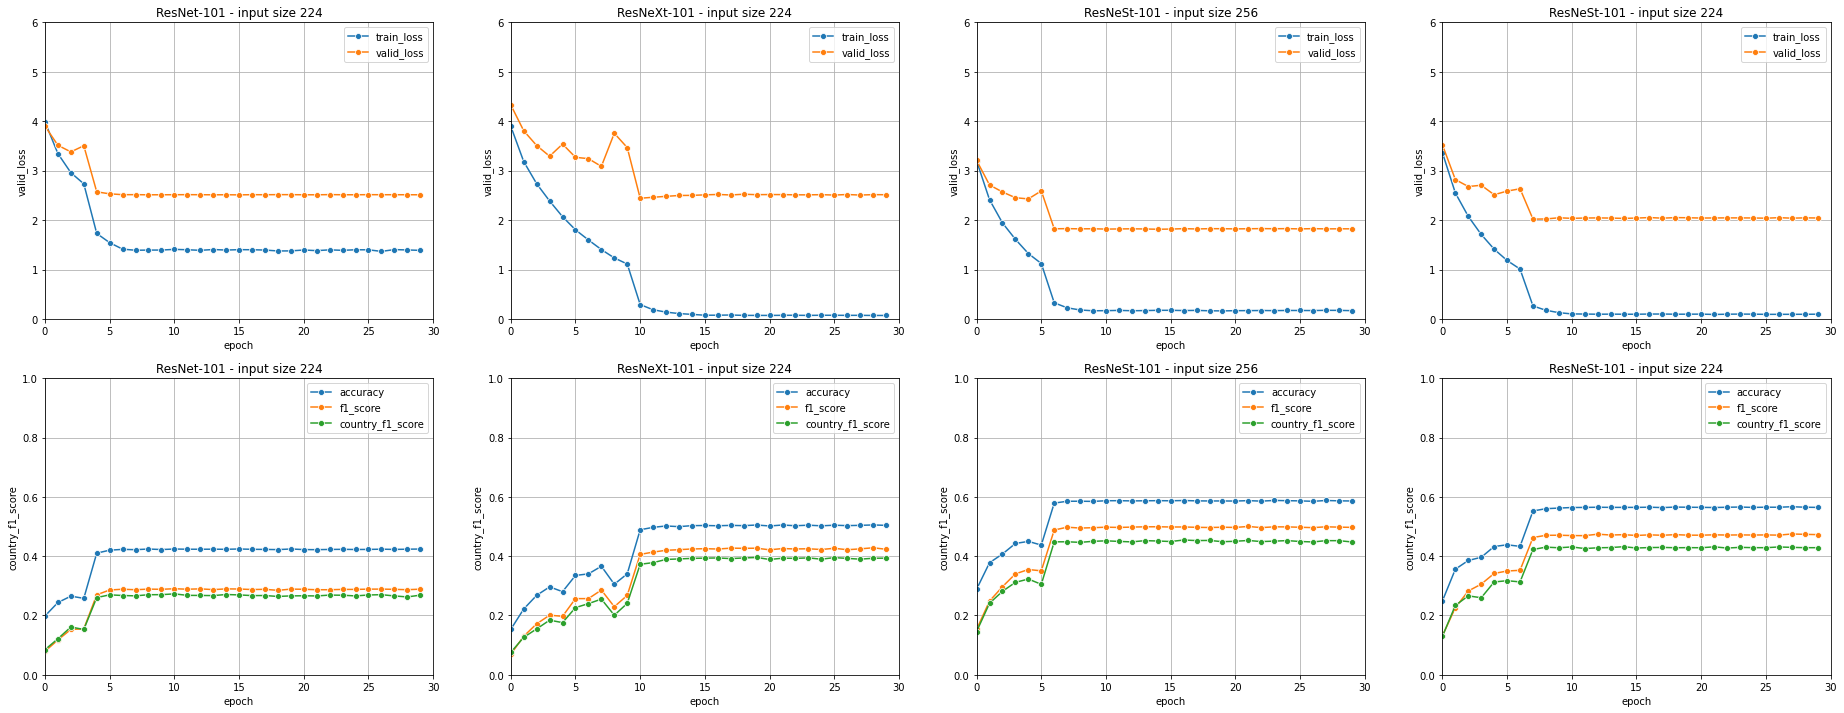

In [4]:
params = dict(loss='ce', batch_size=128)
g1 = results.filter_items(df, outlen=None, model='resnet101', input_size=224, **params)
g2 = results.filter_items(df, outlen=30, model='resnext101', input_size=224, **params)
g3 = results.filter_items(df, outlen=30, model='resnest101', input_size=256, **params)
g4 = results.filter_items(df, outlen=30, model='resnest101', input_size=224, **params)


group_dict = {
    'ResNet-101 - input size 224': g1,
    'ResNeXt-101 - input size 224': g2,
    'ResNeSt-101 - input size 256': g3,
    'ResNeSt-101 - input size 224': g4}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict)